In [1]:
#Codigo Criado por Luiz Eduardo Soares Emidio da Silva durante o desenvolvimento de um PIBIC 
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras import regularizers
from keras.models import Model

from keras import backend as K 
K.set_learning_phase(1)

import matplotlib.pyplot as plt
import matplotlib.style as sty

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

import os
import random as rn
import seaborn as sns

import tensorflow as tf



/usr/local/lib/python3.7/dist-packages/keras/backend.py:414: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [18]:
#Configurações Arbritarias escolhidas para treinamento
batch_size = 64
num_classes = 10
epochs = 10

#Cada imagem do MNIST tem o tamanho de 28 por 28 pixels
img_rows, img_cols = 28, 28

11501568/11490434 [==============================] - 0s 0us/step


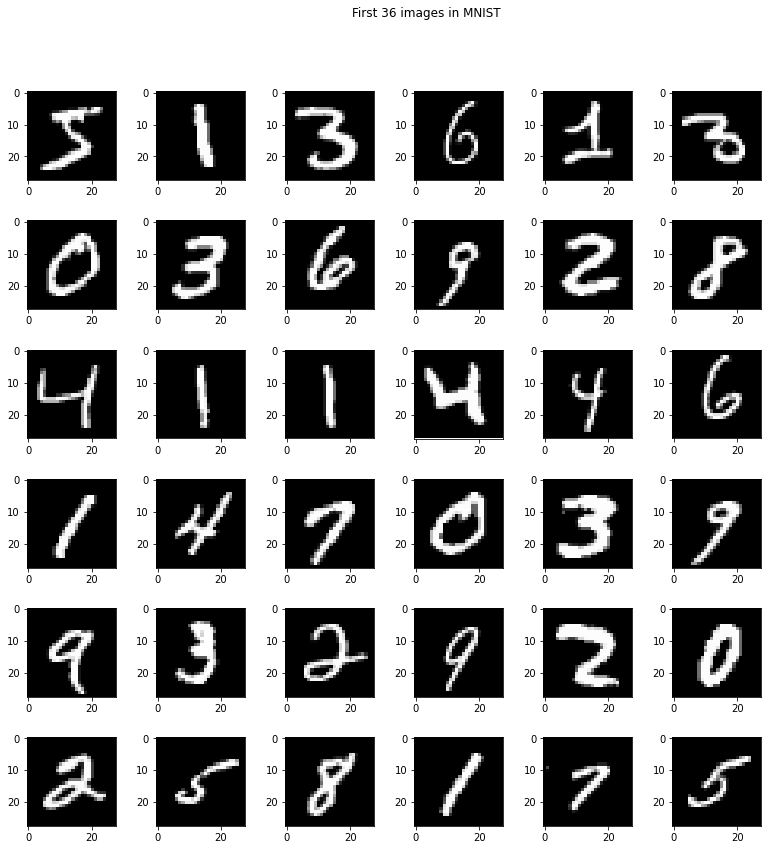

In [3]:
#Carregando imagens e plotando alguns exemplos 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255.0
x_test /= 255.0

# plot first 36 images in MNIST
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(x_train[x + y * 6].reshape((28, 28)), cmap = 'gray')
#    ax[x, y].set_title(y_train[x + y * 6])


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
#Inserir estrutura da CNN nessa parte do codigo
model=Sequential()

model.add(Conv2D(30,
                 (3,3),
                 padding='same',
                 activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4),
                 input_shape=x_train.shape[1:]))
#Pode adicionar um parametro depois sem problemas - Exemplo
#model.add(Activation('relu'))

model.add(BatchNormalization())

model.add(Conv2D(30,
                 (3,3),
                 padding='same',
                 activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#----------------------------------------------------------------

model.add(Conv2D(60,
                 (3,3),
                 padding='same',
                 activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)))

model.add(BatchNormalization())

model.add(Conv2D(60,
                 (3,3),
                 padding='same',
                 activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#--------------------------------------------------------------

model.add(Conv2D(120,
                 (3,3),
                 padding='same',
                 activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)))

model.add(BatchNormalization())

model.add(Conv2D(120,
                 (3,3),
                 padding='same',
                 activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#--------------------------------------------------------------

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))




Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 30)        300       
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 30)       120       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 30)        8130      
                                                                 
 batch_normalization_10 (Bat  (None, 28, 28, 30)       120       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                      

In [16]:
# Compilar a CNN
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'] )


In [15]:
# Imprimir a arquitetura da rede
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 30)        300       
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 30)       120       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 30)        8130      
                                                                 
 batch_normalization_10 (Bat  (None, 28, 28, 30)       120       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                      

In [19]:
# Treinar a CNN
results=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 17s 23ms/step - loss: 0.0866 - accuracy: 0.9858 - val_loss: 0.0792 - val_accuracy: 0.9887
Epoch 2/10
750/750 [==============================] - 16s 22ms/step - loss: 0.0799 - accuracy: 0.9874 - val_loss: 0.0868 - val_accuracy: 0.9857
Epoch 3/10
750/750 [==============================] - 16s 22ms/step - loss: 0.0779 - accuracy: 0.9889 - val_loss: 0.0756 - val_accuracy: 0.9902
Epoch 4/10
750/750 [==============================] - 17s 22ms/step - loss: 0.0746 - accuracy: 0.9899 - val_loss: 0.0840 - val_accuracy: 0.9887
Epoch 5/10
750/750 [==============================] - 17s 22ms/step - loss: 0.0750 - accuracy: 0.9903 - val_loss: 0.0865 - val_accuracy: 0.9883
Epoch 6/10
750/750 [==============================] - 17s 22ms/step - loss: 0.0763 - accuracy: 0.9896 - val_loss: 0.0773 - val_accuracy: 0.9912
Epoch 7/10
750/750 [==============================] - 17s 22ms/step - loss: 0.0724 - accuracy: 0.9911 - val_loss: 0.0710 - val_accuracy:

In [20]:
# Executar a avaliação (teste)
score=model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test acuracy: ', score[1])

Test loss:  0.07479400187730789
Test acuracy:  0.991599977016449


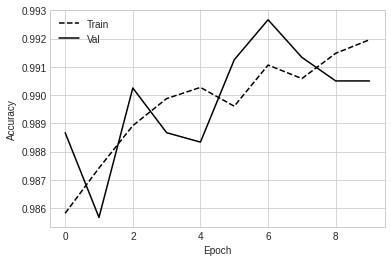

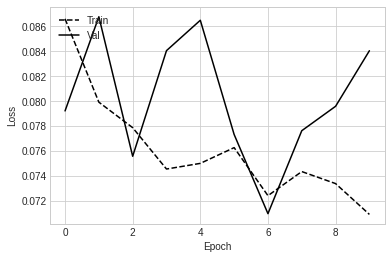

In [21]:
# Plotar o grafico do histórico de evolução do treinamento
sty.use('seaborn-whitegrid')
plt.plot(results.history['accuracy'],'k--')
plt.plot(results.history['val_accuracy'],'k')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plota o grafico do histórico de evolução da taxa de perda da rede 
plt.plot(results.history['loss'],'k--')
plt.plot(results.history['val_loss'],'k')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [22]:
# Plotar Matriz de Confusão

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  print(cm)
  
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
   
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [23]:
# Predição da CNN
y_predict=np.argmax(model.predict(x_test), axis=1)

# Preparar Matriz de Confusão
cm=confusion_matrix(np.argmax(y_test, axis=1), y_predict)

Confusion matrix, without normalization
[[ 974    0    0    0    3    0    2    1    0    0]
 [   0 1124    0    0    0    0    6    5    0    0]
 [   2    1 1019    2    0    0    1    7    0    0]
 [   0    0    0 1000    0    6    0    3    1    0]
 [   0    0    0    0  979    0    1    0    0    2]
 [   0    1    0    2    0  887    1    1    0    0]
 [   3    1    0    0    0    2  952    0    0    0]
 [   0    1    2    0    0    0    0 1025    0    0]
 [   1    0    1    0    0    2    2    0  966    2]
 [   0    0    0    0    7    8    0    4    0  990]]


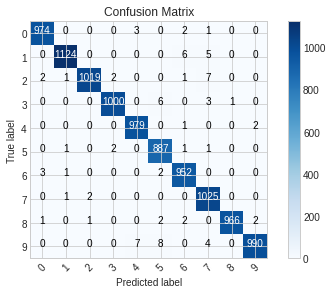

In [24]:
# Chamada da matriz confusão
cm_plot_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm, cm_plot_labels, title= 'Confusion Matrix')

In [25]:
# Salvando o modelo, a arquitetura da CNN
model_json = model.to_json()
with open("cnn.json", "w") as json_file:
  json_file.write(model_json)

# Salvando os pesos da CNN
model.save_weights("cnn_weights.h5")


In [27]:
# Exemplo de como carregar a usar modelo salvo.

from keras.models import model_from_json

# Carregando o modelo
json_file=open("cnn.json", "r")
cnn_json=json_file.read()
json_file.close()

cnn_model=model_from_json(cnn_json)

# Carregando os pesos
cnn_model.load_weights("cnn_weights.h5")

# Predição usando o modelo carregado
y_predict=np.argmax(cnn_model.predict(x_test), axis=1)

y=np.argmax(y_test, axis=1)

# Predição usando apenas uma imagem
exemplo=x_test[2]
exemplo = exemplo.reshape(1, 28, 28, 1)
saida=cnn_model.predict(exemplo)
print(saida)
classe=np.argmax(saida, axis=1)
print(classe)



[[3.1102945e-10 9.9999881e-01 2.2148286e-10 3.4988570e-15 6.0114490e-07
  1.0001245e-08 2.2133557e-09 5.7508498e-07 3.5397619e-08 2.0132627e-09]]
[1]


Classe predita: [6] rótulo: 4 Score:  0.5588063


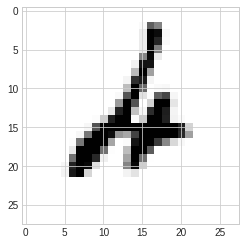

Classe predita: [7] rótulo: 2 Score:  0.7573063


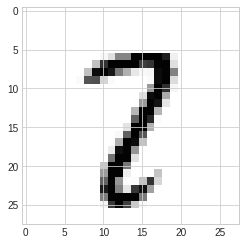

Classe predita: [5] rótulo: 3 Score:  0.9755288


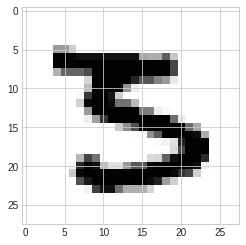

Classe predita: [6] rótulo: 8 Score:  0.6138283


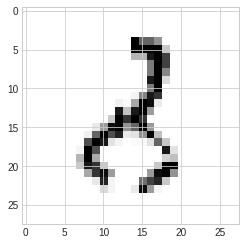

Classe predita: [6] rótulo: 2 Score:  0.94011956


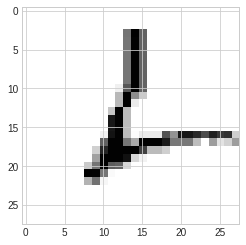

Classe predita: [7] rótulo: 2 Score:  0.72591215


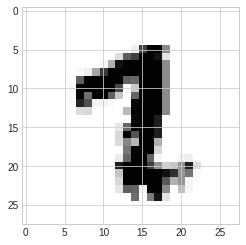

Classe predita: [7] rótulo: 1 Score:  0.7721542


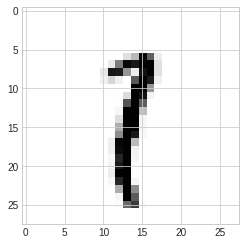

Classe predita: [4] rótulo: 0 Score:  0.9963594


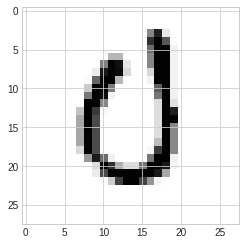

Classe predita: [5] rótulo: 6 Score:  0.4113051


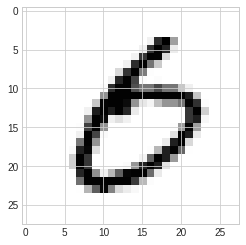

Classe predita: [5] rótulo: 6 Score:  0.88628644


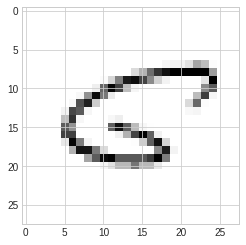

Classe predita: [5] rótulo: 9 Score:  0.6622383


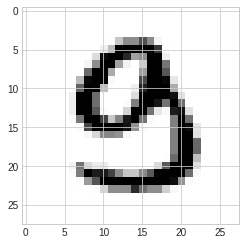

Classe predita: [4] rótulo: 9 Score:  0.98899263


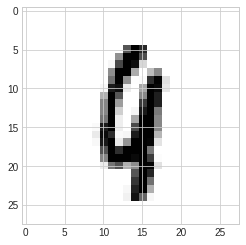

Classe predita: [5] rótulo: 9 Score:  0.6540332


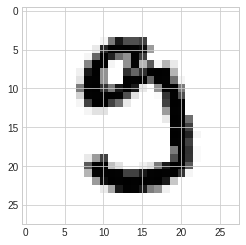

Classe predita: [7] rótulo: 5 Score:  0.9441357


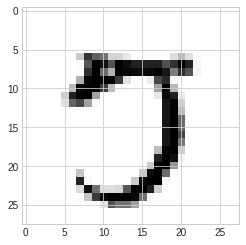

Classe predita: [3] rótulo: 2 Score:  0.9359447


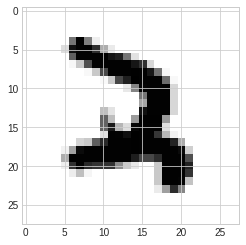

KeyboardInterrupt: ignored

In [28]:
# Plotando os erros do modelo carregado
from matplotlib import pyplot as plt

rotulos=np.argmax(y_test, axis=1)

for i in range(len(x_test)):
  exemplo=x_test[i]
  exemplo = exemplo.reshape(1, 28, 28, 1)
  saida=cnn_model.predict(exemplo)
  classe=np.argmax(saida, axis=1)
  if (classe == rotulos[i]):
    continue
  print("Classe predita:", classe, "rótulo:", rotulos[i], "Score: ", np.max(saida))
  exemplo = exemplo.reshape(28, 28)
  plt.imshow(exemplo, interpolation='nearest')
  plt.show()

